<img src="https://raw.githubusercontent.com/Above02/Statistical_Analysis/main/images/logos/ColorLogo.png">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Above02/Statistical_Analysis/blob/master/notebook/notebook/4_MonteCarlo.ipynb)

<a id="contenido"></a>
<h1><center>Contenido | Módulo 2</center><h1>
    
---
* [Introducción a los métodos de Monte Carlo con Python](#a)   
* [Monte Carlo Estacionario](#b)
* [Monte Carlo Transitorio](#c)
* [Referencias](#f)

<a id="a"></a>
<h1><center>2.10. Introducción - Monte Carlo</center></h1>

[Regreso a contenido](#contenido)

---
![alt text](https://thumbs.gfycat.com/PeriodicTangibleBushbaby-size_restricted.gif)


![alt text](https://steemitimages.com/p/2bP4pJr4wVimqCWjYimXJe2cnCgn5DUA6MvX91E58ut?format=match&mode=fit&width=640)

Los métodos de Monte Carlo (MC) son un subconjunto de algoritmos computacionales que utilizan el proceso de muestreo aleatorio repetido para realizar estimaciones numéricas de parámetros desconocidos. 

---

Permiten modelar situaciones complejas en las que intervienen muchas variables aleatorias y evaluar el impacto del riesgo. 

Los usos de MC son increíblemente amplios y han llevado a una serie de descubrimientos revolucionarios en los campos de la física, la teoría de juegos y las finanzas, entre otros muchos.... 

Existe un amplio espectro de métodos de Monte Carlo, pero todos comparten el rasgo común de que se basan en la generación de números aleatorios para resolver problemas deterministas. Espero esbozar algunos de los principios básicos de MC, y tal vez compartirles un poco de la emoción que tengo sobre sus posibles aplicaciones.

**NOTA: El término Monte-Carlo, hace referencia al casino de Montecarlo, una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la aleatoriedad inherente que poseen.**

![img](https://i.imgur.com/EGbQfMo.gif)

### Objetivos

* Aprender como describir fenómenos naturales
* Una breve introducción a diferentes modelos
* ¿Cómo usar estos modelos se pueden simular en una computadora?

## Ejemplos de fenómenos naturales

* Mecánica de fluidos, astrofísica, química, climatología
* Ciencias ambientales (modelado de un río, de un volcan)
* Competencia entre especies, comportamiento de hormigas... etc

## ¿Qué es un modelo?

* Varias definiciones posibles...
  * Simplificación de realidades abstractas, permitirnos un mejor entendimiento y descripción de éstos.
  * Una abstracción donde sólo los "ingredientes esenciales" se mantienen, de acuerdo a ciertas preguntas acerca del sistema
  * Representación de un fenómeno matemático o basado en un lenguaje computacional

## Modelado y simulación

Es una parte importante de la computación. 

  * Describir, clasificar
  * Entendimiento
  * Predicción
  * Control de fenómenos

## Algunos ejemplos de métodos de modelado

* Dinámica molecular
* Ecuaciones matemáticas
* Métodos monte carlo (equilibrio, dinámica...)
* Autómatas celulares
* Sistemas multi-agentes
* Simulación de eventos discretos

## Del modelo a la simulación

Una vez que se ha identificado el modelo, uno necesita "programarlo", "ejecutarlo" (muchas veces) y estudiar los resultados

* Comprensión del programa computacional, de algoritmos, estructuras de los datos, análisis de los datos/resultados
* Verificar, validar y evaluar predicciones

## Modelado de espacio/tiempo y evolución del tiempo

Los procesos naturales ocurren en el espacio y evolucionan con el tiempo...

Por ejemplo, la temperatura ambiental es diferente de un lugar a otro y cambia con el tiempo.

* Un coche cambia su posición con respecto al tiempo...
* En ocasiones, uno sólo está interesado en la evolución del tiempo de una cantidad, independiente de su localización *espacial* en una población
* Además, podemos tener procesos estacionarios....

---

En la evolución del tiempo, la duración de un proceso se puede *descomponer* en pequeños intervalos de tiempo $\Delta$T y podríamos describir el estado del **sistema** en cada uno de estos pasos..

$$ t_0 = 0, t_1 = \Delta t, ... ,t_n = n\Delta t... $$

## Breve ejemplo

Si quisiéramos encontrar la probabilidad de obtener blackjack (un as junto con una carta de valor diez), podríamos simplemente contar el número de manos posibles donde este es el caso y dividir por el número total de combinaciones posibles de cartas para obtener la probabilidad (es alrededor de 1/21, si tiene curiosidad). 

---

Pero ahora imagine que nuestro espacio muestral es mucho más difícil de calcular, por ejemplo, nuestra baraja de cartas tiene miles en lugar de solo 52 cartas, o mejor aún, ni siquiera sabemos cuántas cartas hay. Hay otra forma de encontrar esta probabilidad.

![img](https://media2.giphy.com/media/l2Sq2mPVJr4tfk436/giphy.gif)


Podríamos acomodarnos en la mesa y jugar cien juegos, registrando los resultados mientras jugamos. 

Podríamos obtener un blackjack 19, 20 o incluso 28 veces, y asignar la probabilidad usando cualquiera de esos valores. Parece una forma bastante mala de evaluar nuestras probabilidades en el casino, pero es de esperar que solo estemos jugando por diversión. Ahora, si vamos de nuevo y jugamos mil, diez mil, millones de veces, la [Ley de los Números Grandes](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros) establece:

**A medida que aumenta el número de variables generadas aleatoriamente distribuidas de manera idéntica, su media (promedio) se aproxima a su media teórica.**

Además de ser fácilmente una de las leyes de la estadística más importantes, esta es la base para las simulaciones de Monte Carlo y nos permite construir un modelo estocástico mediante el método de ensayos estadísticos. Veamos mi ejemplo favorito (y probablemente el más simple) de una estimación de [MC](https://www.statisticshowto.com/monte-carlo-simulation/).

## Números aleatorios en Python
---
En Python el módulo random nos proporciona un rápido generador de números pseudoaleatorios basado en el **[algoritmo Mersenne Twister](https://www.sciencedirect.com/topics/computer-science/mersenne-twister)**; el cual genera números con una distribución casi uniforme y un período grande, haciéndolo adecuado para una amplia gama de aplicaciones. Veamos un pequeño ejemplo.

**import [random](https://docs.python.org/3/library/random.html)** - Este módulo implementa generadores de números pseudoaleatorios para varias distribuciones.

**seed** - El método seed () se utiliza para inicializar el generador de números aleatorios.

El generador de números aleatorios necesita un número para comenzar (un valor inicial), para poder generar un número aleatorio.

**<font color=red>Nota: De forma predeterminada, el generador de números aleatorios utiliza la hora actual del sistema.</font>**

In [1]:
# Utilizando random para genera números aleatorios.
import random

random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

## Estimación Monte Carlo de Pi

Como a todos nos enseñan en geometría de la escuela.... **pi** es una constante que representa la relación entre la circunferencia y el diámetro de un círculo. Es irracional, lo que significa que tiene infinitos dígitos que no siguen ningún patrón. ¿Me creerías si te dijera que podemos estimar pi en tantos dígitos como queramos simplemente jugando a los dardos? Con cierto grado de incertidumbre, por supuesto, ¡después de todo estamos jugando un juego de azar! Vamos a escribir un breve script de Python para ver cómo.

In [2]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

np.random.seed(1984) # para poder replicar el random

%matplotlib inline

Debemos realizar la siguiente fórmula para obtener aquellos puntos que caen dentro del círculo con respecto a los que pertenecen al área del cuadrado simulado:


![img](https://elfreneticoinformatico.com/wp-content/uploads/2018/11/Screenshot_1-1.png)

----

Además, sabemos de cierta forma que el cálculo de las áreas sería de la siguiente manera:

![img](https://elfreneticoinformatico.com/wp-content/uploads/2018/11/pm2.png)

Debemos seguir el siguiente proceso general:

   * Generamos dos números aleatorios entre -1 y 1
   * Calculamos $X^{2} + Y^{2}$
   
      *  Si el valor es <= 1 estaremos dentro del círculo
      *  Si el valor es > 1 estaremos enconces fuera del círculo
      *  Calculamos el número total de veces (puntos) que están dentro del círculo y dividimos entre el total de intentos.  Así obtenemos la probabilidad (aproximada) de caer en el cículo.
      
Con esa probabilidad podremos aproximar el valor de PI, y repetiremos el experimento un número de veces determinadas para obtener diferentes aproximaciones. Nunca va a ser exacto.

Si ya conoces un poco de esto, te habrás dado cuenta de que estamos haciendo una pequeña trampa: solo estamos usando el cuadrante superior derecho del círculo y del cuadrado (un 25 %; En caso de simular datos aleatorios entre 0 y 1). 

Si quisiéramos usar toda la superficie, deberíamos generar números entre -1 y 1. OJO: siempre suponiendo que nuestro origen de coordenadas está en el centro del círculo.

El código final es el siguiente, es bastante fácil de entender:

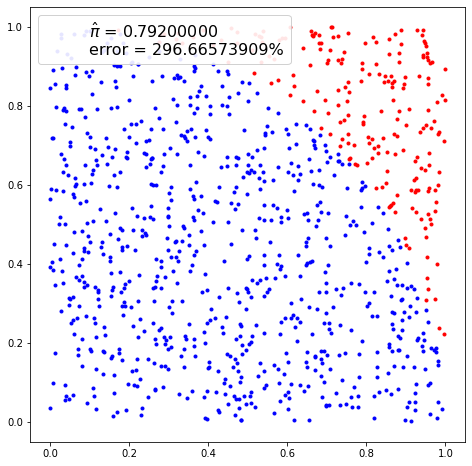

In [3]:
# Ejemplo: Aproximando el valor de pi

def mc_pi_aprox(N=1000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(0, 1, size=(2, N)) # generacion de muestras uniformes x y y, en un intervalo de 0 a 1
    
    interior = (x**2 + y**2) <= 1 
    
    pi = interior.sum() / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.8f}\nerror = {:4.8f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

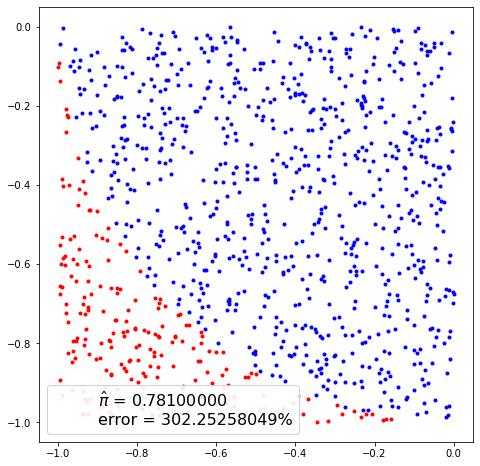

In [4]:
# Ejemplo: Aproximando el valor de pi

def mc_pi_aprox(N=1000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 0, size=(2, N)) # generacion de muestras uniformes x y y, en un intervalo de 0 a 1
    
    interior = (x**2 + y**2) <= 1 
    
    pi = interior.sum() / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.8f}\nerror = {:4.8f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

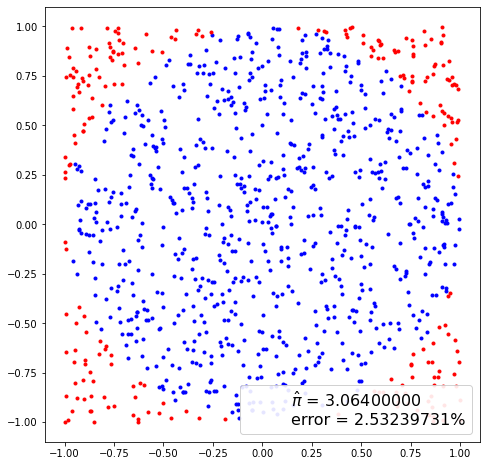

In [5]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.

def mc_pi_aprox(N=1000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N)) # generacion de muestras uniformes x y y, en un intervalo de -1 a 1
    #Lo anterior tiene la finalidad de llenar un cuadrado de 2 dimensiones en el intervalo -1 a 1
    #para posteriormente realizar una comparación de aquellos puntos que caen dentro de la función definida para
    #la circunferencia que es X^2 + Y^2 <= 1
    interior = (x**2 + y**2) <= 1 
    
    # El valor de 4 es debido a los cuadrantes que estamos ocupando
    pi = interior.sum()* 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.8f}\nerror = {:4.8f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

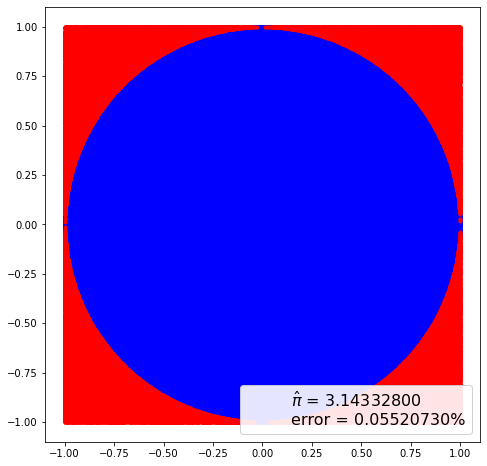

In [6]:
# con 1000000 experimentos
mc_pi_aprox(N=1000000)

# Ejemplo práctico

Para este ejemplo, intentaremos predecir cuánto dinero deberíamos tener de presupuesto para dar comisiones de ventas para el próximo año. Este problema es útil para modelar porque tenemos una fórmula definida para calcular las comisiones y probablemente tengamos alguna experiencia con los pagos de comisiones de años anteriores.

Este problema también es importante desde una perspectiva **empresarial**. Las comisiones de venta pueden ser un gran gasto de venta y es importante planificar adecuadamente este gasto. 

---

Además, el uso de una simulación de Monte Carlo es una mejora relativamente simple que puede realizarse para aumentar lo que normalmente es un proceso de estimación poco sofisticado.

En este ejemplo, la comisión de ventas de muestra se vería así para una fuerza de ventas de 5 personas:

![img](https://pbpython.com/images/Excel_Table_1.png)

En este ejemplo, la comisión es el resultado de esta fórmula:

$$Monto de la comisión = Ventas reales * Tasa de comisión$$

La tasa de comisión se basa en esta tabla de Porcentaje para planificar:

![img](https://pbpython.com/images/Excel_Table_4.png)

Antes de construir un modelo y ejecutar la simulación, veamos un enfoque simple para predecir el gasto de comisión del próximo año.

### Enfoque ingenuo del problema

Imagine que su tarea como analista es decirle a los de finanzas cuánto presupuestar para las comisiones de ventas para el próximo año. Un enfoque podría ser asumir que todos obtienen el 100% de su objetivo y ganan la tasa de comisión del 4%. Conectar estos valores en Excel produce esto:

![img](https://pbpython.com/images/Excel_Table_2.png)

Imagínemos que presenta esto al de finanzas y ellos dicen: *Nunca todos obtienen la misma tasa de comisión. Necesitamos un modelo más preciso*.

Para la segunda ronda, puede probar un par de rangos:

![img](https://pbpython.com/images/Excel_Table_6.png)

Ahora, **tenemos** un poco más de información y volvemos con el experto... Esta vez dicen: "*este rango es útil, pero ¿cuál es su confianza en este rango? Además, necesitamos que haga esto para una fuerza de ventas de 500 personas y modele varias tarifas diferentes para determinar la cantidad a presupuestar*". Hmmm ... Ahora, ¿qué haces?


----


Este enfoque simple ilustra el método iterativo básico para una simulación de Monte Carlo. Repite este proceso muchas veces para determinar un rango de posibles valores de comisión para el año. Hacer esto manualmente ... es un desafío. Afortunadamente, Python simplifica mucho este enfoque.

<a id="b"></a>
<h1><center>2.11. Monte Carlo Estacionario</center></h1>

[Regreso a contenido](#contenido)

---

Ahora que hemos cubierto el problema a un alto nivel, podemos discutir cómo el análisis de Monte Carlo podría ser una herramienta útil para predecir los gastos de comisiones para el próximo año. En su nivel más simple, un análisis (o simulación) de Monte Carlo implica ejecutar muchos escenarios con diferentes entradas aleatorias y resumir la distribución de los resultados.

Usando el análisis de comisiones, podemos continuar el proceso manual que comenzamos anteriormente, pero ejecutamos el programa cientos o incluso miles de veces y obtendremos una distribución de los montos de comisiones potenciales. 

Esta distribución puede informar la probabilidad de que el gasto esté dentro de una ventana determinada. Al final del día, esta es una predicción, por lo que probablemente nunca la predeciremos con exactitud. Podemos desarrollar una idea más informada sobre el riesgo potencial de un presupuesto excesivo o insuficiente.

------------

Hay dos componentes para ejecutar una simulación de Monte Carlo:

  * la ecuación para evaluar
  * las variables aleatorias para la entrada

Ya hemos descrito la ecuación anterior. Ahora debemos pensar en cómo poblar las variables aleatorias.

Un enfoque simple sería tomar un número aleatorio entre 0% y 200% (que representa nuestra intuición sobre las tasas de comisiones). Sin embargo, debido a que pagamos comisiones todos los años, entendemos nuestro problema con un poco más de detalle y podemos usar ese conocimiento previo para construir un modelo más preciso.

Debido a que hemos pagado comisiones durante varios años, podemos observar una distribución histórica típica del porcentaje al objetivo:

![img](https://pbpython.com/images/monte_carlo_image_hist_pct.png)

### Construyendo el modelo... en Python

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

Para este modelo, usaremos una generación de números aleatorios de numpy. El aspecto útil de numpy es que hay varios generadores de números aleatorios que pueden crear muestras aleatorias basadas en una distribución predefinida.

Como se describió anteriormente, sabemos que nuestro porcentaje histórico de rendimiento objetivo se centra en una media del 100% y una desviación estándar del 10%. Definamos esas variables, así como la cantidad de representantes de ventas y simulaciones que estamos modelando:

In [8]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [9]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(4)

In [10]:
pct_to_target

array([0.9917, 0.8036, 1.0794, 1.1433, 0.8208, 1.0113, 1.1045, 0.9102,
       1.1088, 0.8476, 1.0551, 0.8076, 1.0678, 1.095 , 1.2347, 0.94  ,
       0.8555, 1.0606, 0.8039, 1.017 , 0.8279, 0.8484, 0.9634, 0.9367,
       0.9828, 0.9926, 0.9913, 0.9971, 0.8442, 0.8221, 1.0517, 0.9625,
       1.0805, 0.9475, 0.8835, 0.9493, 0.9705, 0.9909, 0.9259, 1.1285,
       0.9145, 1.0095, 1.0008, 0.961 , 1.1423, 0.9641, 1.0479, 1.0249,
       1.1168, 0.9011, 0.9406, 1.0994, 1.0018, 1.0076, 0.8155, 1.0079,
       1.0477, 1.0354, 0.8963, 1.032 , 0.7919, 0.9425, 1.0741, 1.0751,
       1.0401, 0.8993, 0.9722, 1.1088, 0.8813, 1.0926, 1.1346, 1.1731,
       1.1146, 0.9908, 1.0647, 1.1122, 1.0326, 0.937 , 1.0333, 0.989 ,
       1.0747, 0.7262, 1.0919, 1.0255, 1.0239, 0.7958, 0.9416, 0.978 ,
       1.0675, 1.1175, 0.8446, 1.0743, 0.8961, 1.1678, 0.9572, 1.0905,
       0.93  , 1.0391, 1.134 , 1.1305, 0.9645, 1.0081, 1.0279, 1.0933,
       1.058 , 0.9297, 0.8824, 0.9845, 0.9683, 1.074 , 0.9784, 0.9558,
      

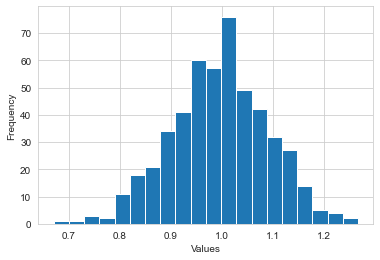

In [11]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(pct_to_target, 20)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Dado que estamos tratando de hacer una mejora en nuestro enfoque simple, vamos a seguir con una distribución normal para el porcentaje objetivo. Sin embargo, al usar numpy, podemos ajustar y usar otra distribución para modelos futuros si es necesario....

Hay otro valor que debemos simular y es el objetivo de ventas real. Para ilustrar una distribución diferente, asumiremos que nuestra distribución objetivo de ventas se parece a esto:

![img](https://pbpython.com/images/monte_carlo_sales_target.png)

[numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [12]:
sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

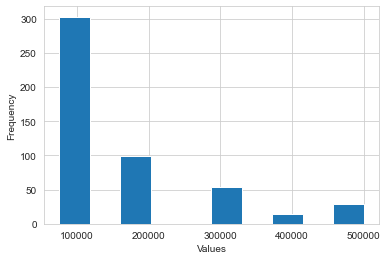

In [13]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(sales_target, 10)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

In [14]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [15]:
df

,Pct_To_Target,Sales_Target,Sales
0,0.9917,300000,297510.0
1,0.8036,75000,60270.0
2,1.0794,200000,215880.0
3,1.1433,100000,114330.0
4,0.8208,100000,82080.0
...,...,...,...
495,1.0179,100000,101790.0
496,0.9206,100000,92060.0
497,0.9374,300000,281220.0
498,1.1472,300000,344160.0


Puede notar que hice un pequeño truco para calcular el monto real de las ventas. Para este problema, la cantidad real de ventas puede cambiar mucho a lo largo de los años, pero la distribución del rendimiento sigue siendo notablemente constante. Por lo tanto, estoy usando las distribuciones aleatorias para generar mis entradas y respaldar las ventas reales.

La última pieza de código que necesitamos crear es una forma de asignar nuestro Pct_To_Target a la tasa de comisión. Aquí está la función:



In [16]:
def calc_commission_rate(x):
    """ Con base a la tabla de comisiones:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

El beneficio adicional de usar Python en lugar de Excel es que podemos crear una lógica mucho más compleja que es más fácil de entender que si intentáramos construir una declaración if anidada compleja en Excel.

Ahora creamos nuestra tasa de comisión y la multiplicamos por las ventas:

In [17]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [18]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.9917,300000,297510.0,0.04,11900.4
1,0.8036,75000,60270.0,0.02,1205.4
2,1.0794,200000,215880.0,0.04,8635.2
3,1.1433,100000,114330.0,0.04,4573.2
4,0.8208,100000,82080.0,0.02,1641.6


¡Ahí está!

Hemos replicado un modelo que es similar a lo que hubiéramos hecho en Excel, pero usamos algunas distribuciones más sofisticadas que simplemente arrojar un montón de entradas de números aleatorios al problema.

Si sumamos los valores (solo los 5 primeros se muestran arriba) en la columna Commission_Amount, podemos ver que esta simulación muestra que pagaríamos de...

In [19]:
df['Commission_Amount'].sum().round(2)

2811242.78

### Hagamos más repeticiones...

La verdadera *magia* de la simulación de Monte Carlo es que si ejecutamos una simulación muchas veces, comenzamos a desarrollar una imagen de la distribución probable de los resultados.

Además de ejecutar cada simulación, guardamos los resultados que nos interesan en una lista que convertiremos en un **dataframe** para un análisis más detallado de la distribución de resultados.

Aquí el código...



In [20]:
# Definamos una lista para guardar resultados de cada simulación para analizar posteriormente
all_stats = []

# Podemos fijar el número de iteraciones...
for i in range(num_simulations):

    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [21]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [22]:
results_df.describe().round(2).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,672,627.75","2,857,821.79","83,665,950.0"
std,"2,824,162.08","107,371.61","2,763,183.77"
min,"76,393,250.0","2,569,770.0","76,350,000.0"
25%,"81,674,000.0","2,781,504.5","81,643,750.0"
50%,"83,616,000.0","2,853,851.0","83,575,000.0"
75%,"85,630,250.0","2,934,811.25","85,581,250.0"
max,"91,294,250.0","3,166,515.0","91,825,000.0"


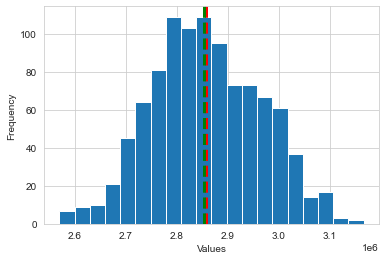

In [23]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(results_df['Commission_Amount'], 20)
plt.axvline(results_df['Commission_Amount'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(results_df['Commission_Amount'].median(), color='green', linestyle='dashed', linewidth=3)

plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

Aquí radica uno de los beneficios de la simulación de Monte Carlo. 

Desarrolla una mejor comprensión de la distribución de resultados probables y puede utilizar ese conocimiento para hacer una estimación informada.

El otro valor de este modelo es que puede modelar muchas suposiciones diferentes y ver qué sucede.

# Reto !

A continuación, se muestran algunos cambios simples que puede realizar para ver cómo cambian los resultados:

  *  Aumente la tasa de comisión máxima al 5%
  *  Disminuir el número de vendedores.
  *  Cambiar la desviación estándar esperada a una cantidad mayor
  *  Modificar la distribución de objetivos



### Nota importante

* Una simulación de Monte Carlo es una herramienta útil para predecir resultados futuros al calcular una fórmula varias veces con diferentes entradas aleatorias. 

* Usar numpy y pandas para construir un modelo y generar múltiples resultados potenciales y analizarlos es relativamente sencillo. El otro beneficio adicional es que los analistas pueden ejecutar muchos escenarios cambiando las entradas y pueden pasar a modelos mucho más sofisticados en el futuro si surgen las necesidades. Finalmente, los resultados se pueden compartir con usuarios no técnicos y facilitar las discusiones en torno a la incertidumbre de los resultados finales.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_h12 = pd.read_excel('https://raw.githubusercontent.com/Above02/Statistical_Analysis/main/data/h12.xls', skiprows=[0])  

In [26]:
df_h12.head()

,Element,Unit,Sample,S,RSD,U
0,Ca,mg/L,3598.922273,NaN,40,NaN
1,Mg,mg/L,1056.487091,NaN,40,NaN
2,Na,mg/L,1680.129729,NaN,40,NaN
3,K,mg/L,249.094420,NaN,40,NaN
4,SO4,mg/L,2896.603374,NaN,40,NaN


In [27]:
df_h12['S_Calc'] = (df_h12['Sample']*df_h12['RSD'])/100

In [28]:
df_h12.head()

,Element,Unit,Sample,S,RSD,U,S_Calc
0,Ca,mg/L,3598.922273,NaN,40,NaN,1439.568909
1,Mg,mg/L,1056.487091,NaN,40,NaN,422.594836
2,Na,mg/L,1680.129729,NaN,40,NaN,672.051892
3,K,mg/L,249.094420,NaN,40,NaN,99.637768
4,SO4,mg/L,2896.603374,NaN,40,NaN,1158.641350


In [29]:
def PosNormal(df, mean_Head, std_Head, repetitions):
    test = pd.DataFrame()
    
    #Conversiones
    for k in range(8):
        val = np.array([1])
        for i in range(11):
            #print(i+(11*k))
            np.random.seed(i+(11*k))
            mu = df[mean_Head][k]
            sigma = df[std_Head][k]
            #np.random.randn(1000000) * sigma + mu
            s = abs(np.random.randn(repetitions) * sigma + mu)#, sigma, repetitions))
            #Corroborar si hay elementos negativos
            #np.concatenate((a, b), axis=0)
            val = np.concatenate((val,s), axis=0)
        #print(val[0])
        val = val[1:]
        test["Element"+str(k)] = val
        print("Element " + str(k))
        print(val.size)
        print(min(val))
        print(max(val))
        print(val.mean())
        print(val.std())
        print(val.std()/val.mean()*100)
        count, bins, ignored = plt.hist(val, 50, density=True)
        plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')

        plt.show()
    return test

Element 0
2200
19.030162915722485
9513.668431345899
3643.093480123416
1427.0276244259126
39.17076605944159


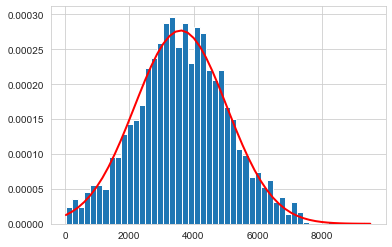

Element 1
2200
5.069251553010872
2470.133333087279
1048.7480240268633
415.1448556205386
39.58480455834497


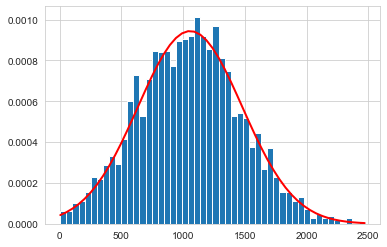

Element 2
2200
4.187096339228674
4366.054092869564
1694.0037420514552
672.4203316393182
39.69414676882653


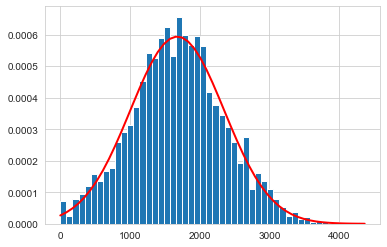

Element 3
2200
0.7013616023141935
591.5941610820232
250.70992506872503
100.66439137861074
40.15173765099904


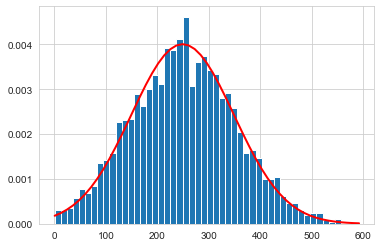

Element 4
2200
41.34294126491295
6736.4281051852995
2893.565171960533
1149.718813775453
39.73364156150877


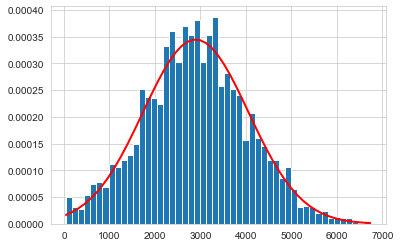

Element 5
2200
17.71381527359472
10231.41531293585
3474.028568328639
1403.708896200616
40.40579599712223


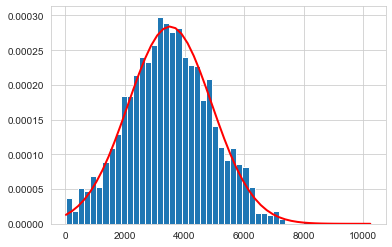

Element 6
2200
1.4496771202966556
3424.231580860477
1487.6581134243893
577.3749252915476
38.810995623349775


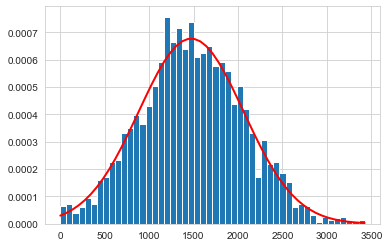

Element 7
2200
24.195032324453678
12744.94045438636
4886.726383741808
1949.6803509135812
39.897473232800365


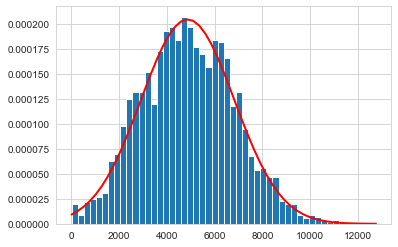

In [30]:
test = PosNormal(df_h12, 'Sample', 'S_Calc', 200)

In [31]:
test.describe()

,Element0,Element1,Element2,Element3,Element4,Element5,Element6,Element7
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,3643.093480,1048.748024,1694.003742,250.709925,2893.565172,3474.028568,1487.658113,4886.726384
std,1427.352059,415.239239,672.573207,100.687277,1149.980203,1404.028030,577.506192,1950.123611
min,19.030163,5.069252,4.187096,0.701362,41.342941,17.713815,1.449677,24.195032
25%,2685.652998,759.189190,1255.681451,180.891674,2142.948341,2502.150918,1106.921287,3509.341845
50%,3634.217470,1052.769457,1689.634231,249.885286,2870.690463,3452.127973,1471.874448,4846.899603
75%,4602.370673,1318.628026,2118.682370,318.545706,3644.703657,4430.746827,1873.269257,6244.704143
max,9513.668431,2470.133333,4366.054093,591.594161,6736.428105,10231.415313,3424.231581,12744.940454


In [32]:
test

,Element0,Element1,Element2,Element3,Element4,Element5,Element6,Element7
0,6138.397184,1795.797631,1618.334612,217.324569,2026.910125,1230.276042,2307.331406,5313.937207
1,4174.976149,935.594120,696.682155,89.377015,4421.789401,3367.080381,833.640093,6166.459824
2,5007.883045,851.712368,2407.149874,96.128738,4340.432739,969.048987,1109.992257,3745.367545
3,6824.842451,64.791631,1519.290797,192.260948,1037.081634,3878.748737,1027.136913,5671.587285
4,6287.400692,1052.986049,1350.065464,227.500096,1195.551400,3874.956322,1677.663332,5786.017312
...,...,...,...,...,...,...,...,...
2195,5405.831353,1239.625089,1156.095647,246.565458,5181.261367,3245.182971,2025.411222,4501.444348
2196,4962.375528,1159.589688,1846.874565,269.549376,511.691189,4321.232986,1337.873068,3957.555457
2197,2127.235585,1230.341894,1887.092442,127.173688,2457.530916,2067.114337,1611.932909,6921.658014
2198,5279.141568,1429.544071,2425.293884,295.668090,1708.994043,2876.092784,1606.121397,8221.245798


### Monte carlo - resultados de apuestas

La idea de una **simulación de Monte Carlo** es probar varias posibilidades de resultados. 

En realidad, solo se cumplirá una de las posibilidades de resultado, pero, en términos de evaluación de riesgos, cualquiera de las posibilidades podría haber ocurrido.

Monte Carlo se utiliza a menudo para evaluar el riesgo de una estrategia comercial determinada, por ejemplo, con opciones o acciones.

---
Los simuladores de Montecarlo pueden ayudar a aclarar que el éxito y el resultado no son la única medida de si una elección fue buena o no. 

Las opciones no deben evaluarse después de su resultado. En cambio, los riesgos y beneficios solo deben considerarse en el momento en que se tomó la decisión, sin sesgos retrospectivos. Un simulador de monte carlo puede ayudar a visualizar la mayoría o todos los resultados potenciales para tener una idea mucho mejor sobre el riesgo de una decisión.

---

Con eso, consideremos un ejemplo básico. Aquí, consideraremos un escenario de juego, donde un usuario puede *lanzar* los dados metafóricos para un resultado de 1 a 100.

* Condiciones: Si el usuario saca algo del 1 al 50, la *casa* gana. Si el usuario obtiene un resultado entre 51 y 99, el "usuario" gana. Si el usuario saca un 100, pierde.

---

Con esto, la casa mantiene una ventaja del 1%, que es mucho menor que la ventaja típica de la casa, así como la ventaja del mercado cuando se incorporan los costos de negociación.

---

Monte Carlo también puede ayudar a ilustrar los defectos de la [falacia del jugador](https://psicologiaymente.com/psicologia/falacia-del-jugador). Muchos jugadores, y en ocasiones especialmente los jugadores que entienden las estadísticas, son víctimas de la falacia del jugador.

La falacia afirma que_ 

* **tomando algo como lanzar una moneda por cara o cruz, tiene una probabilidad conocida de 50/50. Dicho esto, si caen cara cinco veces seguidas, de alguna manera es más probable que caiga cruz a continuación.**

No importa cuántas caras hayan precedido, sus probabilidades, cada vez que lanza la moneda, son 50/50. Es fácil caer en la trampa de pensar que, en una escala a largo plazo, las probabilidades se correlacionarán con 50/50, por lo tanto, si las probabilidades están desequilibradas actualmente, las probabilidades del próximo lanzamiento tampoco son 50/50.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 usuarios ganan. Un 100 perfecto significa que la casa gana.

In [33]:
import random

def rollDice():
    roll = random.randint(1,100)
    return roll

# Now, just to test our dice, let's roll the dice 100 times. 

x = 0
while x < 100:
    result = rollDice()
    print(result)
    x+=1

100
44
40
28
82
50
10
32
91
85
36
7
23
15
68
83
52
41
87
25
24
50
91
96
19
81
46
98
48
66
70
93
81
77
79
33
33
80
60
53
47
61
25
65
42
88
66
73
68
20
82
66
67
56
44
11
53
13
82
51
22
17
81
78
7
63
41
27
66
66
84
79
51
37
96
3
66
24
40
87
54
88
15
60
28
100
66
15
63
35
25
91
16
94
74
87
28
79
4
47


Ahora necesitamos crear un apostador. Eventualmente, crearemos algunos apostadores más sofisticados, pero comenzaremos extremadamente básicos por ahora, ya que incluso el apostador simplista realmente nos mostrará algunas cosas fascinantes en lo que respecta al azar y la posibilidad, usando un generador de monte carlo.

In [34]:
import random

# let us go ahead and change this to return a simple win/loss
def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        print( roll,'el valor fue de 100, has perdido. Play again!')
        return False
    elif roll <= 50:
        print (roll,'el valor fue de 1-50, has perdido.')
        return False
    elif 100 > roll >= 50:
        print (roll,'el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)')
        return True


'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager

    currentWager = 0

    while currentWager < wager_count:
        if rollDice():
            value += wager
        else:
            value -= wager

        currentWager += 1
        print ('Funds:', value)



simple_bettor(1000,100,100)

29 el valor fue de 1-50, has perdido.
Funds: 900
100 el valor fue de 100, has perdido. Play again!
Funds: 800
25 el valor fue de 1-50, has perdido.
Funds: 700
6 el valor fue de 1-50, has perdido.
Funds: 600
58 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 700
73 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 800
81 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 900
55 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1000
88 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1100
22 el valor fue de 1-50, has perdido.
Funds: 1000
84 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1100
64 el valor fue de 51-99, has ganado! *pretty lights flash* (play more!)
Funds: 1200
30 el valor fue de 1-50, has perdido.
Funds: 1100
16 el valor fue de 1-50, has perdido.
Funds: 1000
6 el valor fue de 1-50, has perdido.
Funds: 900
53 

Una de las ideas brillantes más comunes que se le ocurren a las personas es duplicar las pérdidas. Por lo tanto, si pierde, simplemente duplica la cantidad de la apuesta anterior. Continúas esto hasta que ganes.

Si tiene dinero ilimitado, esta estrategia funciona, pero no siempre es así.... Todo lo que hace esta estrategia es acelerar el proceso. Una vez más, cada vez que apuesta, se enfrenta a todas las probabilidades. No puedes evitarlos. De todos modos, ¡lo vamos a ilustrar!

ganamos la última apuesta, yay!
900
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1100
ganamos la última apuesta, yay!
1000
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1200
ganamos la última apuesta, yay!
1100
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1300
ganamos la última apuesta, yay!
1200
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1400
ganamos la última apuesta, yay!
1300
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1500
ganamos la última apuesta, yay!
1400
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
ganamos 200
1600
ganamos la última apuesta, yay!
1500
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
permidos 200
1300
Perdimos el último, así que seremos super inteligentes y duplicaremos.!
permidos 400
900
Perdimos el último, así que s

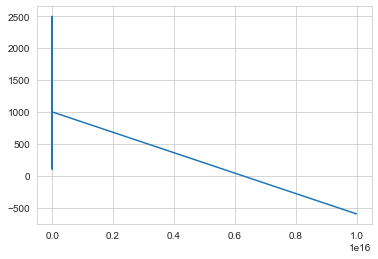

In [35]:
import random
import matplotlib
import matplotlib.pyplot as plt
#
import time

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


def doubler_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1

    # ya que apostaremos basándonos en el resultado de la apuesta anterior #
    previousWager = 'win'

    # ya que estaremos doblando #
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            print ('ganamos la última apuesta, yay!')
            if rollDice():
                value += wager
                print (value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager  
                previousWager = 'loss'
                print (value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    print ('perdimos después de',currentWager,' apuestas')
                    currentWager += 10000000000000000
        elif previousWager == 'loss':
            print ('Perdimos el último, así que seremos super inteligentes y duplicaremos.!')
            if rollDice():
                wager = previousWagerAmount * 2
                print ('ganamos',wager)
                value += wager
                print (value)
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                print ('permidos',wager)
                value -= wager
                if value < 0:
                    print ('perdimos después de',currentWager,'apuestas')
                    currentWager += 10000000000000000
                print (value)
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    print ('perdimos después de',currentWager,'apuestas')
                    currentWager += 10000000000000000

        currentWager += 1

    print( value)
    plt.plot(wX,vY)

doubler_bettor(1000,100,100)
plt.show()


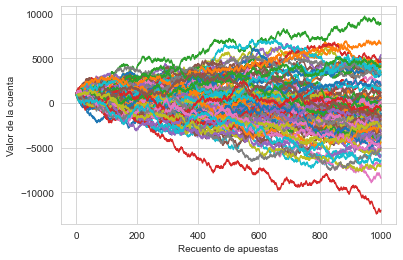

In [36]:

'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)
        currentWager += 1
    plt.plot(wX,vY)
    
x = 0

while x < 100:
    simple_bettor(1000,100,1000)
    x += 1

plt.ylabel('Valor de la cuenta')
plt.xlabel('Recuento de apuestas')
plt.show()

Por eso los jugadores pierden. Por lo general, las probabilidades no están muy en contra de ellos, solo un poco. Los casinos simplemente entienden la psicología básica, sabiendo que *ganar* es extremadamente adictivo. Los casinos están diseñados para mantenerte dentro y seguir jugando.

A corto plazo, la mayoría de los jugadores realmente no se dan cuenta de que es seguro que perderán, las victorias y las derrotas parecen bastante parecidas. Algunas personas, casi la mitad, están estadísticamente seguras de que realmente se beneficiarán. El problema es que esto es adictivo y quieren seguir haciéndolo. Terminan continuando, y la mayoría termina devolviendo sus ganancias. Es simple matemática, pero la psicología humana es débil.

En este punto, los apostadores, con su mente de apostador, comienzan a imaginar varias estrategias para superar sus probabilidades.

Una de las prácticas más comunes aquí es duplicar las pérdidas. Entonces, si pierde, simplemente duplique su apuesta hasta que gane. Una vez que hayas ganado, vuelves a tu punto de partida. Solo necesitamos esa ventaja del 1%, debería ser muy fácil, ¿verdad?



<a id="c"></a>
<h1><center>2.12. Monte Carlo Transitorio</center></h1>

[Regreso a contenido](#contenido)

---

Un proceso estocástico es un concepto matemático que se utiliza para manejar **magnitudes aleatorias** que varían con el tiempo o para caracterizar una sucesión de variables aleatorias llamada estocásticas, que evolucionan en función de otra variable. 

---

### Tipos de procesos estocásticos

Los procesos estocásticos se dividen en dos tipos, que en términos generales y esenciales se pueden definir en impredecibles o en previsibles.

* **Procesos estocásticos estacionarios**: aquellos que la distribución de probabilidad es constante a lo largo de grandes periodos de tiempo.


* **Procesos estocásticos no estacionarios**: son aquellos cuya distribución varia de forma no constante. Es decir,  los datos se comportan de forma totalmente caótica. Los procesos estocásticos no estacionarios están dominados por el azar, son impredecibles. Pero que un proceso sea estocástico no estacionario no quiere decir que sea totalmente caótico. 

¿Cómo escribir una función de python? [Aquí](https://docs.python.org/3/tutorial/classes.html)

Crea una clase "integrador" donde realice la integración de la función: 
$$f(x)=x^{2}e^{−x}sin⁡(x)$$

* Debe proporcionar a la clase el valor mínimo xMin, el valor máximo xMax y el número de intervalos N para la integración. Luego, el proceso de integración debe llevarse a cabo de acuerdo con la siguiente información.

---

Supongamos que: 

$$S=\int_{xMin}^{xMax} f(x)dx\approx\sum_{i=0}^{N-1}f(x_i)\Delta x$$

$$ \Delta x = (xMax-xMin)/N$$

$$x_i=xMin+i\Delta x$$

La clase se compone de tres métodos: _init_, integrar y mostrar:

1. El método de _init_ debe inicializar el xMin, xMax, N y otros parámetros relacionados.

2. El método de integración debe realizar el proceso de integración con los parámetros dados.

3. El método de presentación debe imprimir en la pantalla el resultado de la integración.


Asigne los parámetros con valor: xMin = 1, xMax = 3, N = 200000.

El resultado de la integración de $f(x)$ es igual a ... (5 puntos decimales de precisión):

In [37]:
import numpy as np
import math

class Integrator:
    xMin = 0
    xMax = 0
    N = 0
    s = 0
    def __init__(self, xMin, xMax, N):
        self.xMin=xMin
        self.xMax=xMax
        self.N=N    
            
    def integrate(self):       
        dx = (self.xMax-self.xMin)/(self.N) 
        for i in range(0,self.N-1):
            xi = self.xMin + i*dx
            fx = np.power(xi,2)*np.power(math.e,-xi)*math.sin(xi)
            self.s=self.s+fx
        self.s=self.s*dx
        
    def show(self):
        print(round((self.s),5))
        

examp = Integrator(1,3,200000)
examp.integrate()
examp.show()

0.76374


MCMC nos permite extraer muestras de una distribución incluso si no podemos calcularla. Se puede utilizar para muestrear la distribución posterior (lo que deseamos saber) sobre los parámetros. Ha tenido mucho éxito en muchas aplicaciones, como calcular la distribución de parámetros dado un conjunto de observaciones y alguna creencia previa, y también calcular integrales de alta dimensión en física y en comunicaciones digitales....

# El algoritmo Metropolis-Hastings
---
Uno de los métodos MCMC más populares es el algoritmo Metropolis-Hastings; de hecho la mayoría de los algoritmos de MCMC pueden ser interpretados como casos especiales de este algoritmo. 

El algoritmo Metropolis-Hastings esta catalogado como uno de los 10 algoritmos más importantes y más utilizados en ciencia e ingeniería en los últimos veinte años.Se encuentra en el corazón de la mayoría de los métodos de muestreo [MCMC](https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50). 

* $Q(\theta′/\theta)$ para ayudar a extraer muestras de una distribución posterior intratable $P(\Theta = \theta/D)$.

Metropolis-Hastings usa Q para *caminar* aleatoriamente en el espacio de distribución, aceptando o rechazando saltos a nuevas posiciones según la probabilidad de la muestra. Este paseo aleatorio “sin memoria” es la parte de la “Cadena de Markov” de MCMC.

---

La "probabilidad" de cada nueva muestra se decide mediante una función f. Es por eso que **f** debe ser proporcional al posterior del que queremos tomar la muestra. **f** se elige comúnmente para ser una función de densidad de probabilidad que expresa esta proporcionalidad.

----

Para obtener una nueva posición del parámetro, simplemente tomamos nuestro actual, $\theta$, y proponga una nueva, $\theta′$, que es una muestra aleatoria extraída de $Q(\theta′/\theta)$. A menudo, esta es una distribución simétrica. Por ejemplo, una distribución normal con media $\theta$ y alguna desviación estándar $\sigma$ : $Q(\theta′/\theta) = N (\theta, \sigma)$



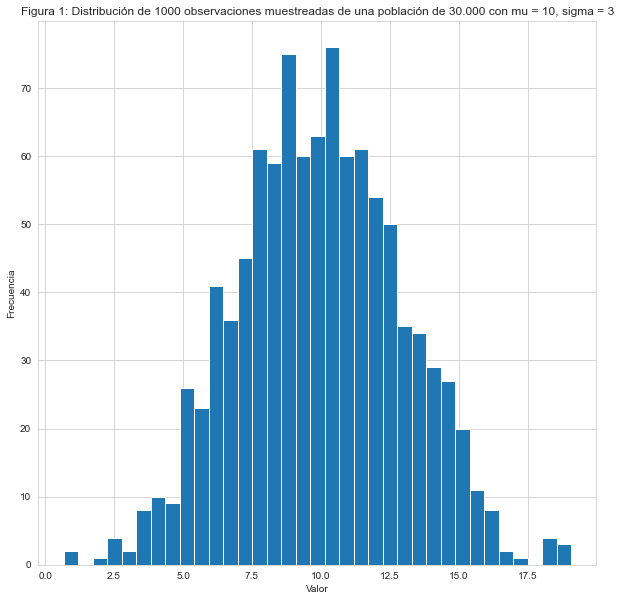

In [38]:
import numpy as np
import matplotlib.pyplot as plt
mod1 = lambda t:np.random.normal(10,3,t)

#Formar una población de 30,000 individuos, con promedio = 10 y escala = 3
population = mod1(30000)
# Supongamos que solo podemos observar a 1,000 de estos individuos.
observation = population[np.random.randint(0, 30000, 1000)]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( observation,bins=35)
ax.set_xlabel("Valor")
ax.set_ylabel("Frecuencia")
ax.set_title("Figura 1: Distribución de 1000 observaciones muestreadas de una población de 30.000 con mu = 10, sigma = 3")
mu_obs=observation.mean()
mu_obs

plt.show()

[likelihood_computer](https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/) y [normal distribution](https://www.onlinemathlearning.com/normal-distribution.html)

![img](https://www.onlinemathlearning.com/image-files/normal-distribution-formula.png)

----

En estadística, la función de verosimilitud (a menudo llamada simplemente verosimilitud | **likelihood**) mide la bondad de ajuste de un modelo estadístico a una muestra de datos para valores dados de los parámetros desconocidos. 


Se forma a partir de la distribución de probabilidad conjunta de la muestra ([cdf](https://dlsun.github.io/symbulate/joint.html)), pero se considera y se utiliza como una función de los parámetros únicamente, por lo que se tratan las variables aleatorias como fijas en los valores observados.

In [39]:
#El modelo de transición define cómo pasar de sigma_current a sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],0.5,(1,))]

def prior(x):
    #x [0] = mu, x [1] = sigma (nuevo o actual)
    # devuelve 1 para todos los valores válidos de sigma. Log (1) = 0, por lo que no afecta la suma.
    # devuelve 0 para todos los valores inválidos de sigma (<= 0). Log (0) = - infinito y Log (número negativo) no está definido.
    # Hace que el nuevo sigma sea infinitamente improbable.
    if(x[1] <=0):
        return 0
    return 1

# Calcula la probabilidad de los datos dado un sigma (nuevo o actual)
def manual_log_like_normal(x,data):
    #x [0] = mu, x [1] = sigma (nuevo o actual)
    #data = la observación
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

# Igual que manual_log_like_normal (x, data), pero usando la implementación scipy. Es bastante lento.
def log_lik_normal(x,data):
    #x [0] = mu, x [1] = sigma (nuevo o actual)
    #data = la observación
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))


# Define si aceptar o rechazar la nueva muestra
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Como hicimos una probabilidad logarítmica, necesitamos exponenciar para comparar con el número aleatorio
        # es menos probable que x_new sea menos probable que se acepten
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer (x, data): devuelve la probabilidad de que estos parámetros generen los datos
    # transition_model (x): una función que extrae una muestra de una distribución simétrica y la devuelve
    # param_init: una muestra inicial
    # iterations: número de aceptadas a generadas
    # data: los datos que deseamos modelar
    # accept_rule (x, x_new): decide si aceptar o rechazar la nueva muestra
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [40]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu_obs,0.1], 50000,observation,acceptance)

In [41]:
accepted[-10:,1]

array([array([2.98581743]), array([2.9278803]), array([2.88511064]),
       array([2.94541361]), array([2.8242307]), array([3.05467098]),
       array([3.06270992]), array([2.99125185]), array([3.01896217]),
       array([3.05036058])], dtype=object)

In [42]:
print(accepted.shape)

(8279, 2)


(8279, 2)

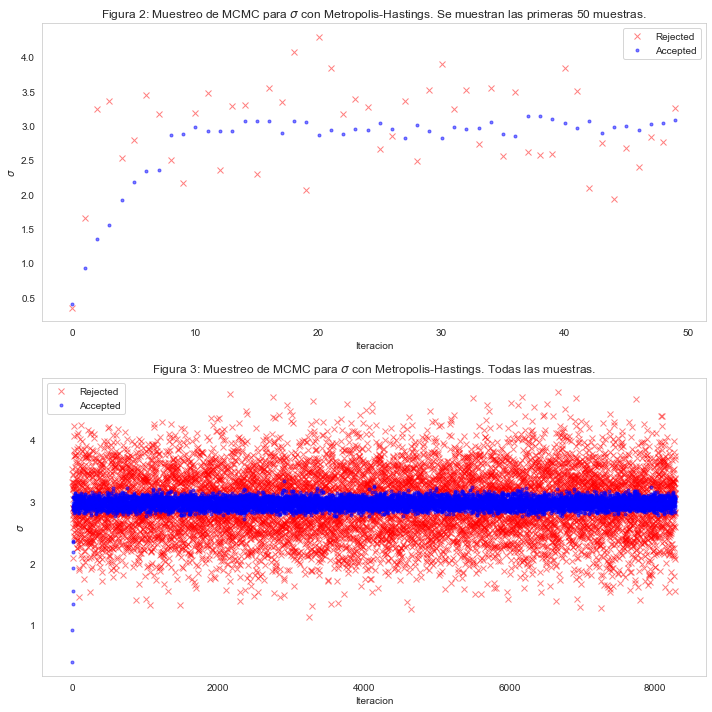

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteracion")
ax.set_ylabel("$\sigma$")
ax.set_title("Figura 2: Muestreo de MCMC para $\sigma$ con Metropolis-Hastings. Se muestran las primeras 50 muestras.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
# Descarte para visualizar ambos valores
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteracion")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figura 3: Muestreo de MCMC para $\sigma$ con Metropolis-Hastings. Todas las muestras.")
ax2.grid()
ax2.legend()

fig.tight_layout()
accepted.shape

Como vemos, las distribuciones estimadas utilizando MCMC se acercan bastante a las distribuciones reales.

In [44]:
# Ejemplo algoritmo metropolis
def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x
    
    return muestras

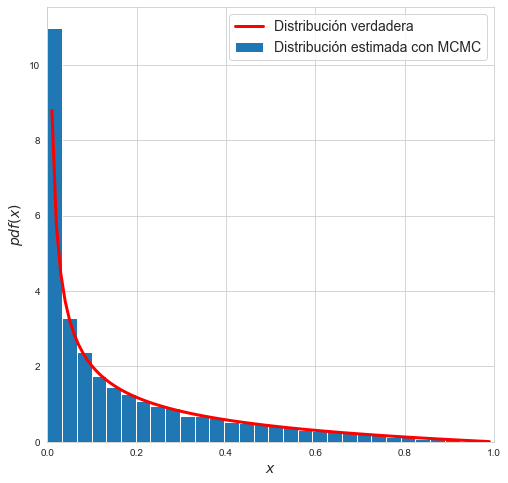

In [45]:
# distribución beta
func = stats.beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

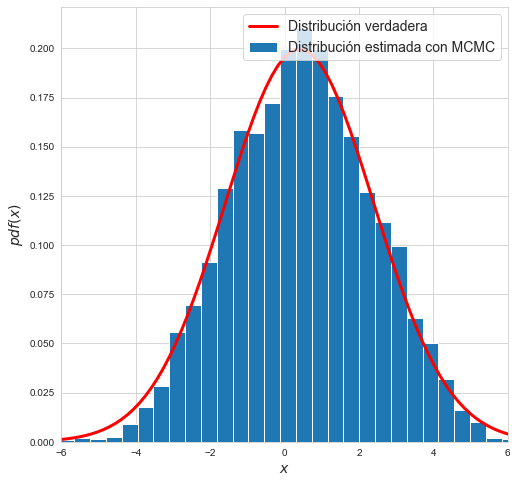

In [46]:
# distribución normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

Como vemos, las distribuciones estimadas utilizando MCMC se acercan bastante a las distribuciones reales.

# Ejemplo de algo real...

Una mancha solar es una región de la superficie del Sol (fotosfera) que está marcada por una temperatura más baja que su entorno. 

Las manchas solares suelen aparecer en pares de polaridad magnética opuesta. Su número varía según el ciclo solar de aproximadamente 11 años.

----

Los datos en los que trabajaremos son el "Número medio mensual de manchas solares totales", para cada mes desde enero de 1749 hasta noviembre de 2018. Se trata de datos recopilados, seleccionados y puestos a disposición del público por el [Centro Mundial de Datos para la producción, preservación y difusión de el número internacional de manchas solares](http://www.sidc.be/silso/home).

(3238,) (3238,)
1785.042


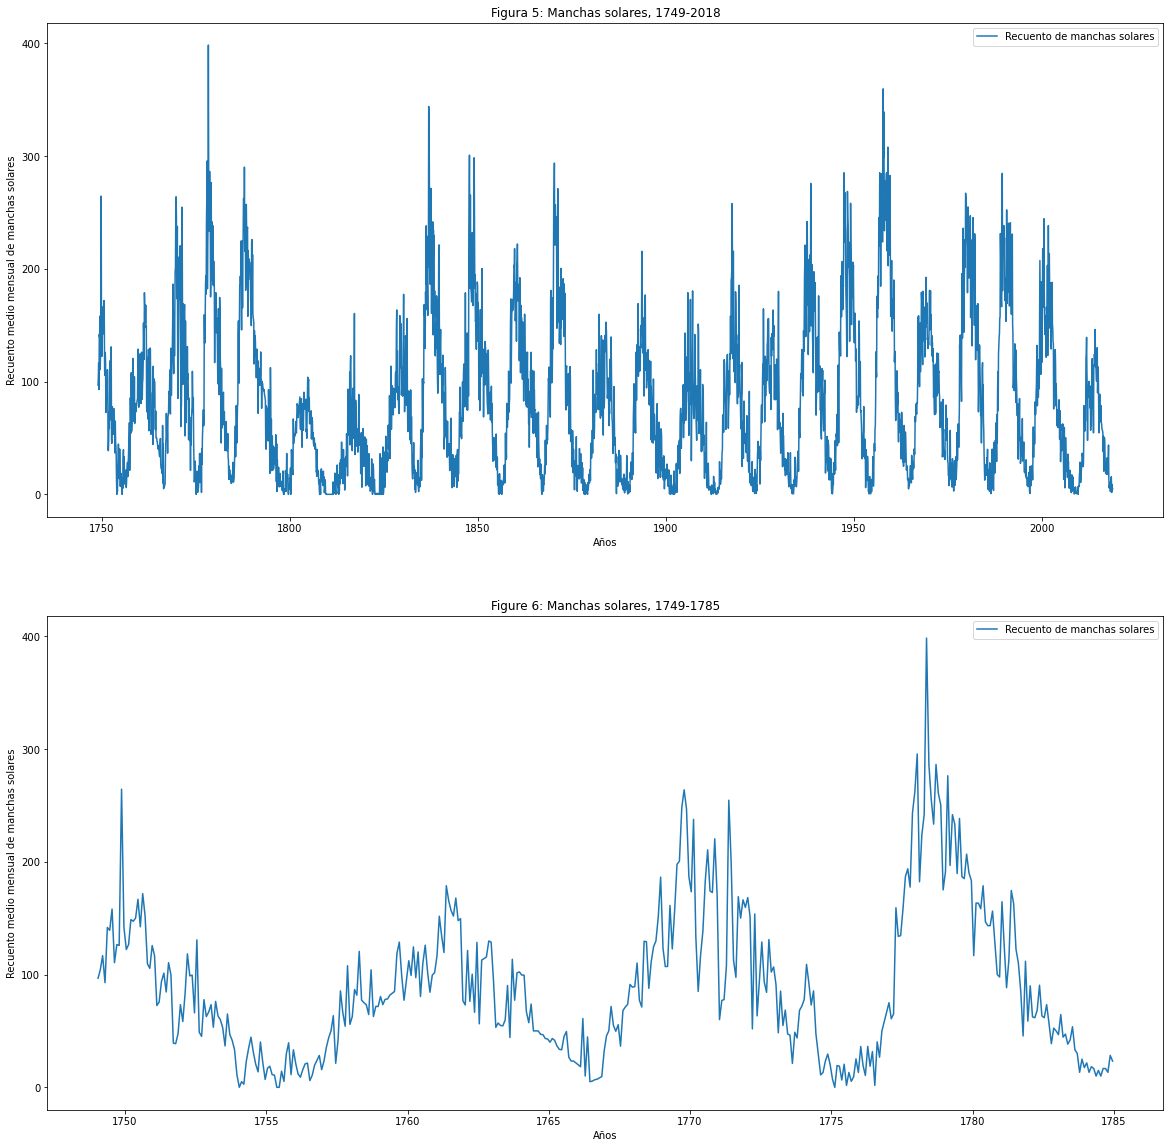

In [4]:
sunspots = np.loadtxt("https://raw.githubusercontent.com/Above02/Statistical_Analysis/main/data/test.csv", delimiter=';')

#years is the third column
years = sunspots[:,2]
#activity is the 4th column
activity = sunspots[:,3] + 0.1
print(years.shape,activity.shape)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2,1,1)

ax.plot(years, activity, label="Recuento de manchas solares")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Años")
ax.set_ylabel("Recuento medio mensual de manchas solares")
ax.set_title("Figura 5: Manchas solares, 1749-2018")
ax.legend()


ax = fig.add_subplot(2,1,2)
print(years[432])
ax.plot(years[:432], activity[:432], label="Recuento de manchas solares")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Años")
ax.set_ylabel("Recuento medio mensual de manchas solares")
ax.set_title("Figure 6: Manchas solares, 1749-1785")
ax.legend()

Parece que podríamos modelar este fenómeno con alguna distribución, con un nuevo ciclo que se reinicia cada 11-12 años.


--

Una distribución [gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma) $\Gamma$ es una familia de dos parámetros de distribuciones de probabilidad continuas, los parámetros son la forma a y la escala b. Una variable aleatoria X que tiene distribución gamma se indica $X ~ \Gamma (a, b)$, y en nuestro caso X es el recuento de manchas solares. Los dos parámetros a y b son las incógnitas para las que nos gustaría calcular las distribuciones.

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Gamma_distribution_pdf.png/440px-Gamma_distribution_pdf.png)

Por ejemplo, en el primer ciclo, el recuento de manchas solares comienza desde su máximo en alrededor de 300 a fines de 1749, y cae al mínimo 6 años después, durante 1755. Luego, el número aumenta nuevamente a su máximo durante 1761 y 1762 antes. cayendo de nuevo durante 1766 y así sucesivamente ...

### Asegurémonos trazando un histograma de recuentos de manchas solares:

Text(0.5, 1.0, 'Figura 7: Histograma que muestra la frecuencia del recuento de manchas solares durante 270 años (1749-2018)')

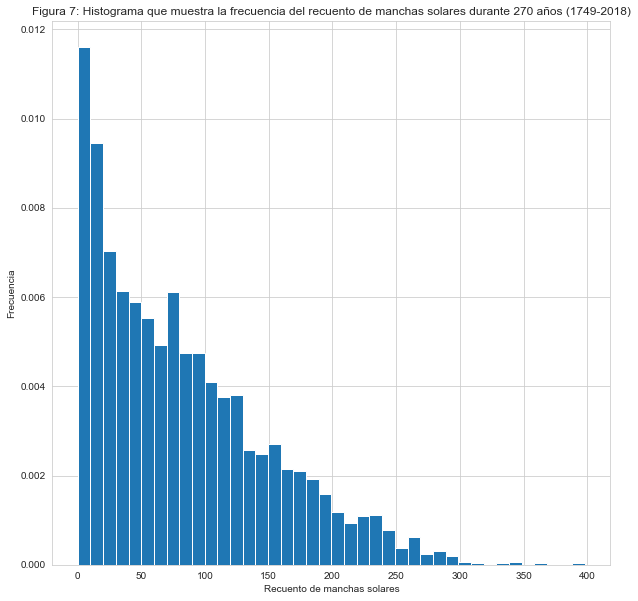

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(activity, bins=40, density=True)
ax.set_xlabel("Recuento de manchas solares")
ax.set_ylabel("Frecuencia")
ax.set_title("Figura 7: Histograma que muestra la frecuencia del recuento de manchas solares durante 270 años (1749-2018)")

In [49]:
transition_model = lambda x: np.random.normal(x,[0.05,5],(2,))
import math
def prior(w):
    if(w[0]<=0 or w[1] <=0):
        return 0
    else:
        return 1
    
def manual_log_lik_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_lik_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data)))

In [50]:
accepted, rejected = metropolis_hastings(manual_log_lik_gamma,prior,transition_model,[4, 10], 50000,activity,acceptance)

In [51]:
print(accepted.shape)
accepted[-10:]

(8553, 2)


array([[ 0.97985495, 84.41764005],
       [ 0.97394601, 85.74101851],
       [ 1.01014496, 83.34787208],
       [ 0.99601246, 82.91167432],
       [ 0.99704836, 82.42052543],
       [ 1.01902908, 80.13373803],
       [ 0.97814933, 86.45245181],
       [ 0.98494011, 87.34618621],
       [ 0.98600865, 84.91879887],
       [ 0.97247271, 86.96586878]])

A partir de a = 4 y b = 10, el algoritmo aceptó aproximadamente más de 8000 pares de muestras (puede variar por el uso de la semilla), están bastante lejos de los valores iniciales.....

---

Al igual que con el ejemplo de datos ficticios, veamos cómo el algoritmo se abrió camino hacia estos valores:

Text(0.5, 1.0, 'Figura 10: Muestreo de MCMC para $a$ y $b$ con Metropolis-Hastings. Se muestran las últimas 50 muestras.')

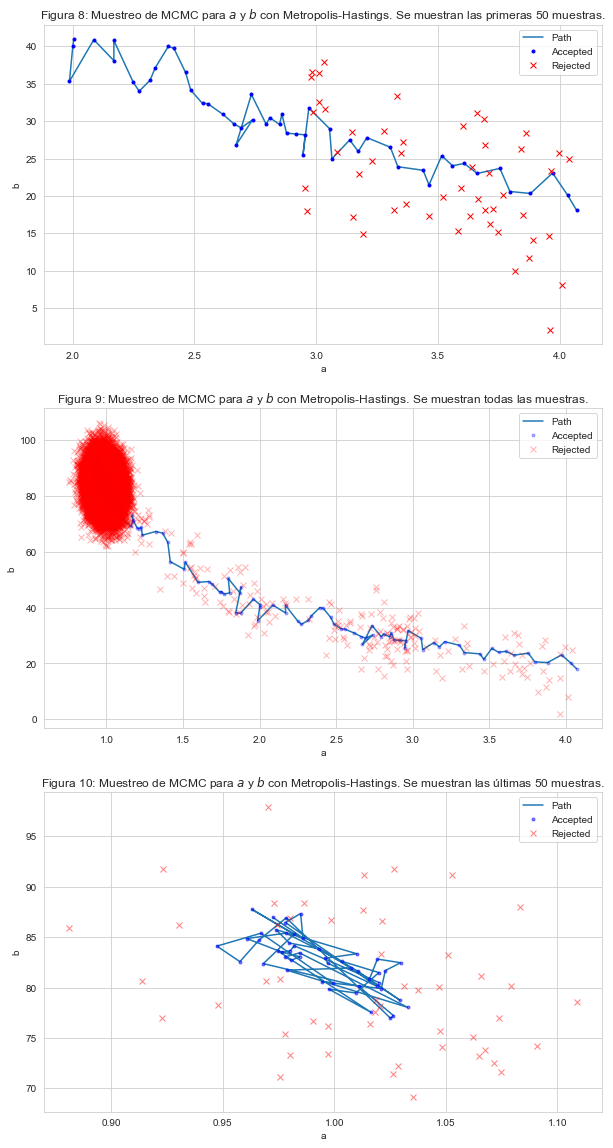

In [52]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(accepted[:50,0], accepted[:50,1], label="Path")
ax.plot(accepted[:50,0], accepted[:50,1], 'b.', label='Accepted')
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figura 8: Muestreo de MCMC para $a$ y $b$ con Metropolis-Hastings. Se muestran las primeras 50 muestras.")  


ax = fig.add_subplot(3,1,2)
ax.plot(accepted[:,0], accepted[:,1], label="Path")
ax.plot(accepted[:,0], accepted[:,1], 'b.', label='Accepted',alpha=0.3)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label='Rejected',alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figura 9: Muestreo de MCMC para $a$ y $b$ con Metropolis-Hastings. Se muestran todas las muestras.") 

to_show=50
ax = fig.add_subplot(3,1,3)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label="Path")
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figura 10: Muestreo de MCMC para $a$ y $b$ con Metropolis-Hastings. Se muestran las últimas 50 muestras.")

Como podemos ver en las figuras 8, 9 y 10, el algoritmo converge rápidamente a la zona [a = 1, b = 85].

Sugerencia: cuando el algoritmo comienza a rechazar muestras en gran medida, eso significa que hemos alcanzado una zona de saturación de probabilidad. Por lo general, esto se puede interpretar como haber alcanzado el espacio de parámetros óptimo del que podemos muestrear, es decir, hay muy pocas razones para que el algoritmo acepte nuevos valores. Esto está marcado en las figuras 9 y 10 donde el algoritmo ya no acepta ningún valor fuera de un rango pequeño.

Text(0.5, 1.0, 'Histograma 2D que muestra la distribución conjunta de $a$ y $b$')

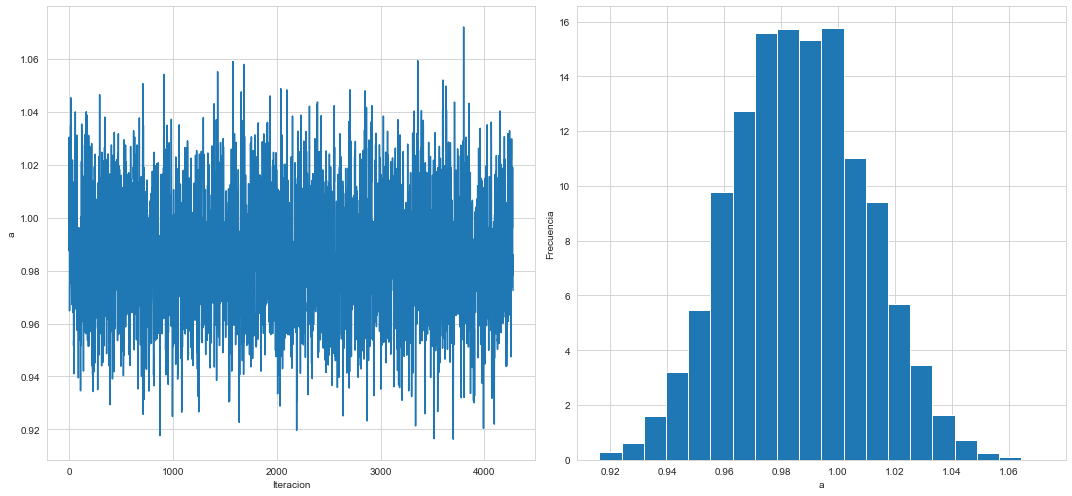

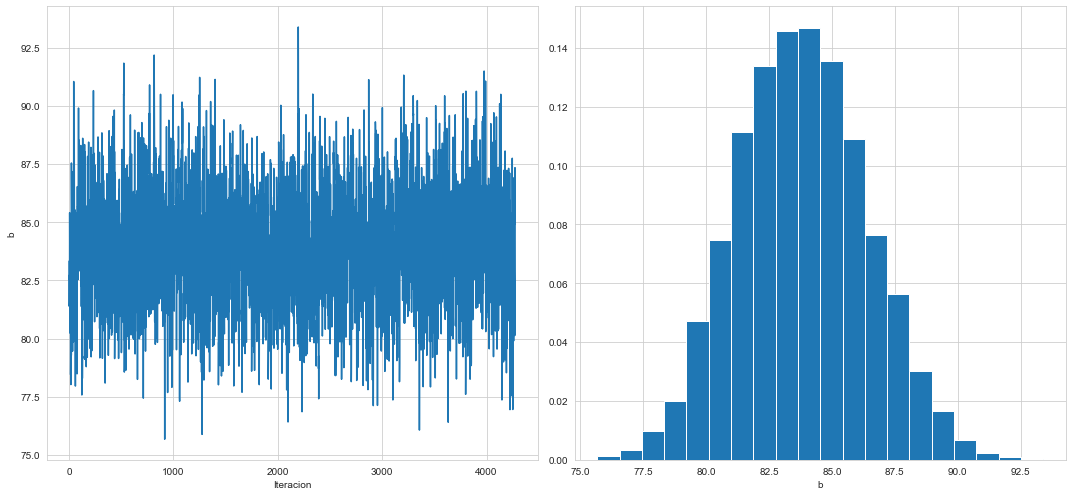

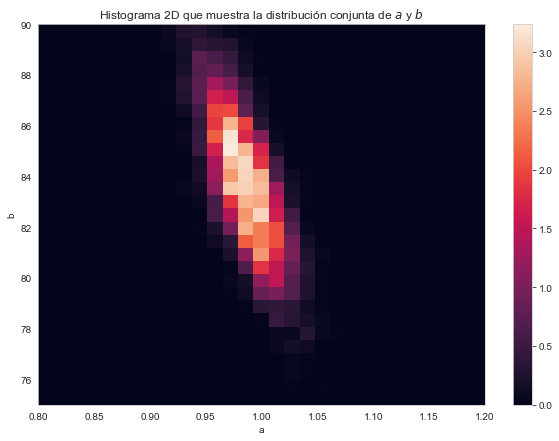

In [53]:
show=int(-0.5*accepted.shape[0])
hist_show=int(-0.50*accepted.shape[0])


fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,0])
ax.set_xlabel("Iteracion")
ax.set_ylabel("a")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,0], bins=20, density=True)
ax.set_ylabel("Frecuencia")
ax.set_xlabel("a")
fig.tight_layout()

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_xlabel("Iteracion")
ax.set_ylabel("b")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20, density=True)
ax.set_xlabel("b")
fig.tight_layout()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
xbins, ybins = np.linspace(0.8,1.2,30), np.linspace(75,90,30)
counts, xedges, yedges, im = ax.hist2d(accepted[hist_show:,0], accepted[hist_show:,1], density=True, bins=[xbins, ybins])
ax.set_xlabel("a")
ax.set_ylabel("b")
fig.colorbar(im, ax=ax)
ax.set_title("Histograma 2D que muestra la distribución conjunta de $a$ y $b$")

### Tiempo de predicción

Primero, promediamos el último 50% de las muestras aceptadas de a y b, y generamos individuos aleatorios a partir de una distribución $\Gamma$. $ a_ {promedio} $ = 0.9866200759935773 y $ b_ {promedio} $ = 83.70749712447888.

0.9862296376406009 83.80337828320752


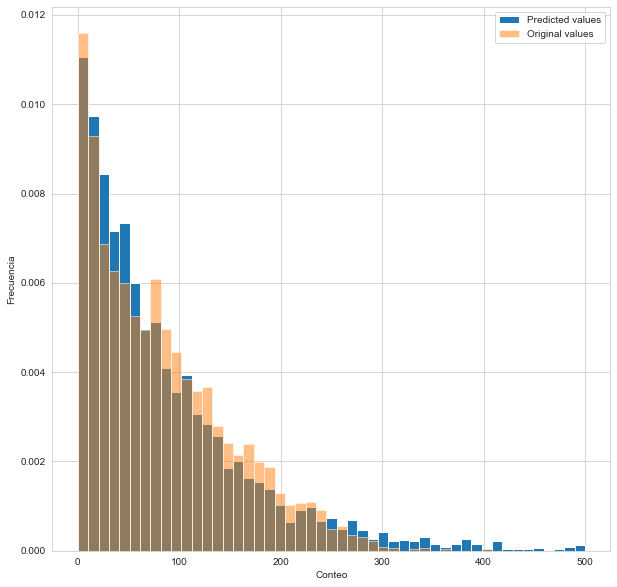

In [54]:
show=-int(0.5*accepted.shape[0])

mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.gamma(mu,sigma,t)
t=np.arange(activity.shape[0])
observation_gen=model(t.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)



ax.hist( observation_gen,bins=np.linspace(0,500,50) ,density=True,label="Predicted values")
ax.hist( activity,bins=np.linspace(0,500,50) ,alpha=0.5,density=True, label="Original values")
ax.set_xlabel("Conteo")
ax.set_ylabel("Frecuencia")
ax.legend()

### Evaluación de la distribución de la propuesta

¿Cómo especificamos los parámetros para la distribución Q? ¿Deberíamos alejarnos de la muestra actual $\Theta$ o permanecer relativamente cerca? Estas preguntas se pueden responder midiendo la autocorrelación entre las muestras aceptadas: no queremos que las muestras aceptadas estén demasiado correlacionadas entre sí. No queremos que las muestras distantes estén demasiado correlacionadas ya que estamos tratando de implementar una cadena de Markov, es decir, una muestra solo debe depender de su muestra anterior, y la gráfica de autocorrelación debe mostrar una disminución rápida y exponencial entre la correlación de la muestra i y i-1, i-2, ... etc

0.9862296376406009 83.80337828320752


[Text(0.5, 0, 'lag'), Text(0, 0.5, 'autocorrelation'), (-0.1, 1.0)]

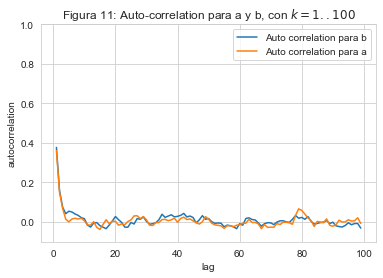

In [55]:
mean_acc_0=accepted[show:,0].mean()
mean_acc_1=accepted[show:,1].mean()
print(mean_acc_0,mean_acc_1)

lag=np.arange(1,100)
def autocorr(accepted,lag):
    num_0=0
    denom_0=0
    num_1=0
    denom_1=0
    for i in range(accepted.shape[0]-lag):
        num_0+=(accepted[i,0]-mean_acc_0)*(accepted[i+lag,0]-mean_acc_0)
        num_1+=(accepted[i,1]-mean_acc_1)*(accepted[i+lag,1]-mean_acc_1)
        denom_0+=(mean_acc_0-accepted[i,0])**2
        denom_1+=(mean_acc_1-accepted[i,1])**2
    rk_0=num_0/denom_0
    rk_1=num_1/denom_1
    return rk_0, rk_1


accepted_reversed=accepted[show:,:]
result=np.zeros((2,lag.shape[0]))
#print(lag)
for l in lag:
    result[:,l-1]=autocorr(accepted_reversed,l)
    
    
###Instead of writing an autocorrelation function, one could simply use thee autocorr function provided in pymc3    
#from pymc3.stats import autocorr

fig, ax = plt.subplots()
#ax.plot(lag, [autocorr(accepted[show:,1], l) for l in lags], label='auto b')
#ax.plot(lag, [autocorr(accepted[show:,0], l) for l in lags], label='auto a')
ax.plot(lag, result[1,:], label='Auto correlation para b')
ax.plot(lag, result[0,:], label='Auto correlation para a')
ax.legend(loc=0)
ax.set_title("Figura 11: Auto-correlation para a y b, con $k=1..100$")
ax.set(xlabel='lag', ylabel='autocorrelation', ylim=(-.1, 1))

En nuestro caso, tenemos la suerte de tener una correlación lo suficientemente baja. En general, es posible que queramos configurar los parámetros de distribución de la propuesta, Q, automáticamente, un método común es seguir ajustando los parámetros de la propuesta para que se rechacen más del 50% de las propuestas. Alternativamente, se podría usar una versión mejorada de MCMC llamada [Hamiltonian Monte Carlo](https://towardsdatascience.com/python-hamiltonian-monte-carlo-from-scratch-955dba96a42d), que reduce la correlación entre los sucesivos estados muestreados y alcanza la distribución estacionaria más rápidamente.

---

### Conclusión

Si bien la abstracción detrás de este algoritmo puede parecer fuera de alcance al principio, la implementación es bastante simple y da resultados asombrosos. De hecho, lo mejor de la programación probabilística, en particular MCMC, es que solo necesita escribir el modelo y luego ejecutarlo. No es necesario calcular la evidencia ni asegurar algunas propiedades matemáticas restrictivas.

---
---
---
<a id="f"></a>
<h1><center>Referencias y links de interés</center></h1>

[Regreso a contenido](#contenido)

---

* [Ley de los Grandes Números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros)
* Información extra de [Métodos Monte Carlo](https://www.statisticshowto.com/monte-carlo-simulation/)
* Información sobre algoritmo [Mersenne Twister](https://www.sciencedirect.com/topics/computer-science/mersenne-twister)
* M. Matsumoto and T. Nishimura (1998) - [Mersenne twister: a 623-dimensionally equidistributed uniform pseudo-random number generator](https://dl.acm.org/doi/10.1145/272991.272995)

* [Cadenas de Markov](https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50)
* [Más de MCMC](http://people.duke.edu/~ccc14/sta-663/MCMC.html)

--------

* La [falacia del jugador: qué es y cómo nos afecta](https://psicologiaymente.com/psicologia/falacia-del-jugador)
* [Funciones en python](https://docs.python.org/3/tutorial/classes.html)

* [Función lambda](https://www.w3schools.com/python/python_lambda.asp)
* [likelihood_computer](https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/) y [normal distribution](https://www.onlinemathlearning.com/normal-distribution.html)
* [cdf](https://dlsun.github.io/symbulate/joint.html)
